(-2.5, 0.1)

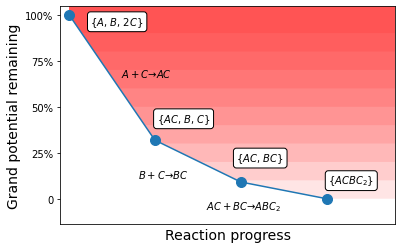

In [1]:
import scipy.interpolate
import matplotlib.pyplot as plt
import numpy

x = [0, 1, 2, 3]
y = [0, -1.5, -2.0, -2.2]
plt.plot(x, y, 'o-', markersize=10)
plt.xlabel('Reaction progress', fontsize=14)
plt.ylabel('Grand potential remaining', fontsize=14)

x.append(4)
y.append(-2.2)
y_interp = scipy.interpolate.interp1d(x, y, kind='linear')
x = numpy.linspace(0, 4, 100)
y = y_interp(x)

for y_percent in range(1, 11):
    plt.fill_between(x, numpy.maximum(y, -2.2/10*y_percent), 0.1, facecolor='red', alpha=0.1)

# plt.xticks([0, 1, 2, 3])
plt.xticks([])
plt.yticks([0, -2.2/4, -2.2/2, -2.2/4*3, -2.2], ['100%', '75%', '50%', '25%', '0'])

plt.text(0.25, -0.12, '{$A$, $B$, $2C$}', bbox=dict(facecolor='white', alpha=1.0, edgecolor='k', boxstyle='round,pad=0.3'))
plt.text(1.02, -1.28, '{$AC$, $B$, $C$}', bbox=dict(facecolor='white', alpha=1.0, edgecolor='k', boxstyle='round,pad=0.3'))
plt.text(1.95, -1.75, '{$AC$, $BC$}', bbox=dict(facecolor='white', alpha=1.0, edgecolor='k', boxstyle='round,pad=0.3'))
plt.text(3.02, -2.02, '{$ACBC_2$}', bbox=dict(facecolor='white', alpha=1.0, edgecolor='k', boxstyle='round,pad=0.3'))

plt.text(0.60, -0.75, '$A+C\\to AC$', bbox=dict(facecolor='white', alpha=0.0, edgecolor='none', boxstyle='round,pad=0.3'))
plt.text(0.80, -1.95, '$B+C\\to BC$', bbox=dict(facecolor='white', alpha=0.0, edgecolor='none', boxstyle='round,pad=0.3'))
plt.text(1.60, -2.33, '$AC+BC\\to ABC_2$', bbox=dict(facecolor='white', alpha=0.0, edgecolor='none', boxstyle='round,pad=0.3'))
plt.xlim([-0.1, 3.8])
plt.ylim([-2.5, 0.1])
# plt.grid('on')

In [2]:
from s4.tmr import (
    ReactionEnergies, MaterialWithEnergy,
    MPInterpolatedMaterial, GasMaterial)
from s4.cascade.analysis import compute_cascade
from s4.thermo.calc.mp import query_system
from pymatgen.core import Composition as C

reaction = ReactionEnergies(
    target=C('Na2(CoO2)3'),
    vars_sub={},
    species=[
        MaterialWithEnergy(
            thermo=MPInterpolatedMaterial(
                compositions=[C('Na2(CoO2)3')], amounts=[1./3], mp_entries=[query_system('Na2(CoO2)3')[0]]),
            composition=C('Na2(CoO2)3'), is_target=True, side='product', amt=1./3),
        MaterialWithEnergy(
            thermo=MPInterpolatedMaterial(
                compositions=[C('CoO')], amounts=[1.], mp_entries=[query_system('CoO')[0]]),
            composition=C('CoO'), is_target=False, side='reactant', amt=1.),
        MaterialWithEnergy(
            thermo=MPInterpolatedMaterial(
                compositions=[C('Na2O2')], amounts=[1./3], mp_entries=[query_system('Na2O2')[0]]),
            composition=C('Na2O2'), is_target=False, side='reactant', amt=1./3),
    ]
)

compute_cascade(reaction, [500]*10, only_icsd=False)

/Users/huohaoyan/miniconda3/envs/s4/lib/python3.7/site-packages/maggma/utils.py:20: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


[{'driving_force': -0.4195086425659669,
  'temperature': 500,
  'previous_vessel': {1.0 CoO, 0.3333 Na2O2},
  'current_vessel': {0.3333 CoO, 0.6667 Na1Co1O2},
  'reason': 'cascade: determined by minimizing dG/m.a'},
 {'driving_force': -0.037765379636589554,
  'temperature': 500,
  'previous_vessel': {0.3333 CoO, 0.6667 Na1Co1O2},
  'current_vessel': {0.5 Na1Co1O2, 0.1667 Na1Co3O6},
  'reason': 'cascade: determined by minimizing dG/m.a'},
 {'driving_force': -0.021780617177087437,
  'temperature': 500,
  'previous_vessel': {0.5 Na1Co1O2, 0.1667 Na1Co3O6},
  'current_vessel': {0.2222 Na1Co1O2, 0.1111 Na4Co7O14},
  'reason': 'cascade: determined by minimizing dG/m.a'},
 {'driving_force': -0.0015646056138710655,
  'temperature': 500,
  'previous_vessel': {0.2222 Na1Co1O2, 0.1111 Na4Co7O14},
  'current_vessel': {0.0667 Na4Co7O14, 0.1333 Na3Co4O8},
  'reason': 'cascade: determined by minimizing dG/m.a'},
 {'driving_force': 0.0018870757762980397,
  'temperature': 500,
  'previous_vessel': {0.0